# Statistical Thinking in Python

## 1. Graphical exploratory data analysis

Seaborn is an excellent Matplotlib-based statistical data visualization package written by Michael Waskom.

In [2]:
import pandas as pd
df_swing = pd.read_csv('data/01-2008_swing_states.csv')
df_swing[['state', 'county', 'dem_share']].head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


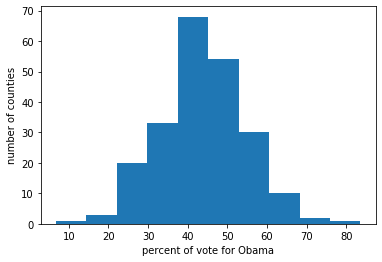

In [3]:
# Generating a histogram
import matplotlib.pyplot as plt

plt.hist(df_swing['dem_share'])
plt.xlabel('percent of vote for Obama')
plt.ylabel('number of counties')

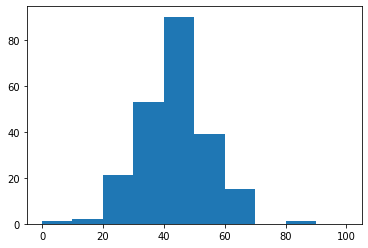

In [13]:
# Histograms with different binning
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(df_swing['dem_share'], bins=bin_edges);

**Binning bias**

- The same data maybe interpreted diferently depending on choice of bins


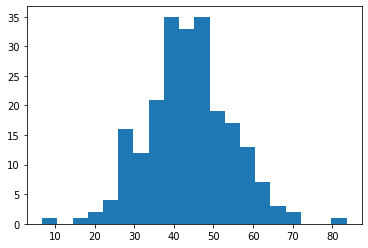

In [14]:
plt.hist(df_swing['dem_share'], bins=20);

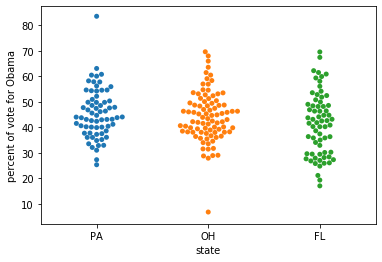

In [16]:
# Generating a bee swarmplot
import seaborn as sns
sns.swarmplot(x='state', y='dem_share', data=df_swing)
plt.xlabel('state')
plt.ylabel('percent of vote for Obama')
plt.show()

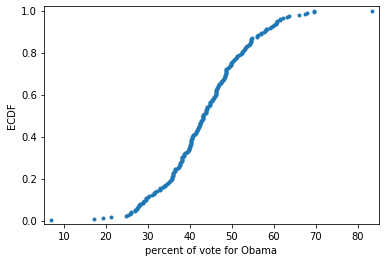

In [5]:
# Making an ECDF: Empirical cumulative distribution function (ECDF)
import numpy as np
x = np.sort(df_swing['dem_share'])  # ordenamiento de menor a mayor
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')  # solo puntos
plt.xlabel('percent of vote for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)  # Keeps data off plot edges
plt.show()

![]()

<img src='figures/01.01-ecdf.PNG' width="500" height="500">

“Exploratory data analysis can never be the wholes tory, but nothing else can serve as the foundation stone.” — JohnTukey


**Let's Practice**

**Plotting a histogram of iris data**

For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of scikit-learn. Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use sns.set(), where sns is the alias that seaborn is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array versicolor_petal_length.

In the video, Justin plotted the histograms by using the pandas library and indexing the DataFrame to extract the desired column. Here, however, you only need to use the provided NumPy array. Also, Justin assigned his plotting statements (except for plt.show()) to the dummy variable _. This is to prevent unnecessary output from being displayed. It is not required for your solutions to these exercises, however it is good practice to use it. Alternatively, if you are working in an interactive environment such as a Jupyter notebook, you could use a ; after your plotting statements to achieve the same effect. Justin prefers using _. Therefore, you will see it used in the solution code.


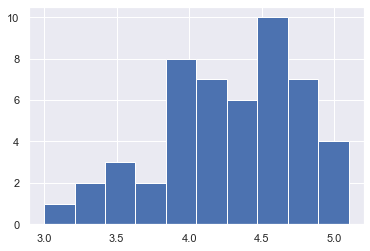

In [20]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = np.array([
    4.7, 4.5, 4.9, 4., 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4., 4.7, 3.6,
    4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4., 4.9, 4.7, 4.3, 4.4, 4.8, 5., 4.5, 3.5,
    3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4., 4.4, 4.6, 4., 3.3, 4.2,
    4.2, 4.2, 4.3, 3., 4.1
])

plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

**Axis labels!**

In the last exercise, you made a nice histogram of petal lengths of Iris versicolor, but you didn't label the axes! That's ok; it's not your fault since we didn't ask you to. Now, add axis labels to the plot using plt.xlabel() and plt.ylabel(). Don't forget to add units and assign both statements to _. The packages matplotlib.pyplot and seaborn are already imported with their standard aliases. This will be the case in what follows, unless specified otherwise.

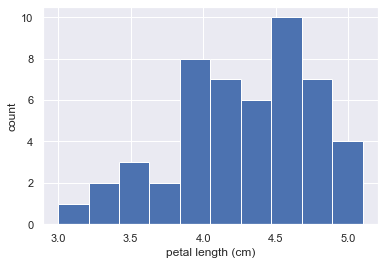

In [21]:
# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

**Adjusting the number of bins in a histogram**

The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of plt.hist().

The plotting utilities are already imported and the seaborn defaults already set. The variable you defined in the last exercise, versicolor_petal_length, is already in your namespace.

**Hint**

- Import modules using the import keyword followed by the module name and then alias it to a shorter name such as plt or pd. For example: import pandas as pd.
- Use len('Variable name') to determine the number of data points and store it in n_data.
- To calculate the square root of 4, we can use np.sqrt(4). Here, we want to calculate the square root of the number of data points we have.
- To convert a variable into an integer, use the built in function int() with the number of bins as the argument.
- Remember to include n_bins as an argument alongside versicolor_petal_length in plt.hist().

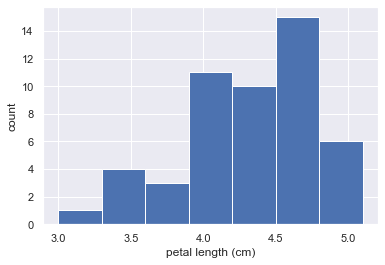

In [22]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

**Bee swarm plot**

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as df.

For your reference, the code Justin used to create the bee swarm plot in the video is provided below:
```
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()
```

In the IPython Shell, you can use sns.swarmplot? or help(sns.swarmplot) for more details on how to make bee swarm plots using seaborn.

In [ ]:
help(sns.swarmplot)

**Instructions**

- In the IPython Shell, inspect the DataFrame df using df.head(). This will let you identify which column names you need to pass as the x and y keyword arguments in your call to sns.swarmplot().
- Use sns.swarmplot() to make a bee swarm plot from the DataFrame containing the Fisher iris data set, df. The x-axis should contain each of the three species, and the y-axis should contain the petal lengths.
- Label the axes.
- Show your plot.

Hint

- df.head() will show you that the DataFrame has 5 columns. However, only two of these are of interest to us: species, and petal length (cm).
- If you are unsure of how to use sns.swarmplot(), either refer to the example in the exercise description or use help(sns.swarmplot) to look at the documentation. The function signature is sns.swarmplot(x = 'X axis', y = 'Y axis', data = 'DataFrame name').
- Label your axes as before with plt.xlabel() and plt.ylabel().
- Use plt.show() to display the plot.

In [49]:
# Generando el dataframe: iris_df

from sklearn import datasets

iris = datasets.load_iris()
from pprint import pprint
# pprint(iris) # Para visualizar el dataset

columns = [
    'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
    'petal width (cm)'
]
iris_df = pd.DataFrame(iris['data'], columns=columns)
# iris_df

# ['setosa', 'versicolor', 'virginica']
target = pd.Series(iris['target'])
target[target == 0] = 'setosa'
target[target == 1] = 'versicolor'
target[target == 2] = 'virginica'
# target

iris_df['species'] = target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


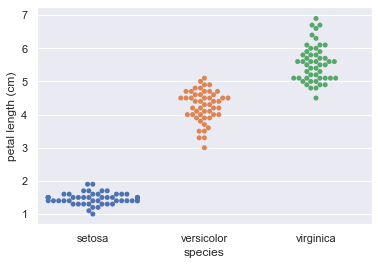

In [50]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal length (cm)', data=iris_df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

**Interpreting a bee swarm plot**

Which of the following conclusions could you draw from the bee swarm plot of iris petal lengths you generated in the previous exercise? For your convenience, the bee swarm plot is regenerated and shown to the right.


- All I. versicolor petals are shorter than I. virginica petals.
- I. setosa petals have a broader range of lengths than the other two species.
- **I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.**
- I. versicolor is a hybrid of I. virginica and I. setosa.
---
- No, the bee swarm plot shows that a couple I. versicolor flowers had petals 5 cm or longer, and several I. virginica flowers had petals shorter than 5 cm..
- Be careful. The "broadness" in the x-direction is not a property of the data, only of the plotting routine to enable you to see all data points. The I. setosa petal lengths are all between 1 and 2 cm, so they are in a tighter range than the other species.

---

Correct! Notice that we said "tend to be." Some individual I. virginica flowers may be shorter than individual I. versicolor flowers. It is also possible that an individual I. setosa flower may have longer petals than in individual I. versicolor flower, though this is highly unlikely, and was not observed by Anderson.


**Computing the ECDF**

In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, foo(x,y) according to the following skeleton:
```
def foo(a,b):
    """State what function does here"""
    # Computation performed here
    return x, y
```
The function foo() above takes two arguments a and b and returns two values x and y. The function header def foo(a,b): contains the function signature foo(a,b), which consists of the function name, along with its parameters. 

**Instructions**

- Define a function with the signature ecdf(data). Within the function definition,
- Compute the number of data points, n, using the len() function.
- The -values are the sorted data. Use the np.sort() function to perform the sorting.
- The  data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange(). Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1. Be sure to divide this by n.
- The function returns the values x and y.


**Hint**
- len(data) computes the number of data points in data.
np.sort(data) returns a sorted copy of data: These represent our -values.
- Remember that the end value in `np.arange()` is not inclusive, i.e., `np.arange(1, 5)` gives an array with entries 1, 2, 3, 4. - - Try this out in the IPython Shell with different values to get a better intuition for it. To obtain the  data, you will need to use `np.arange(1, n+1)` and divide the result by n.

In [52]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

**Plotting the ECDF**

You will now use your ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. You will then plot the ECDF. Recall that your ecdf() function returns two arrays so you will need to unpack them. An example of such unpacking is x, y = foo(data), for some function foo().

**Instructions**

- Use ecdf() to compute the ECDF of versicolor_petal_length. Unpack the output into x_vers and y_vers.
- Plot the ECDF as dots. Remember to include marker = '.' and linestyle = 'none' in addition to x_vers and y_vers as arguments inside plt.plot().
- Label the axes. You can label the y-axis 'ECDF'.
- Show your plot.


**Hint**

- Refer to the unpacking of the function foo() described above, substituting versicolor_petal_length, x_vers, and y_vers appropriately into the ecdf() function.
- plt.plot() has many parameters that we can use to stylize our plots. Here, we want the marker parameter to have the argument . and linestyle to have none, like so: plt.plot(x, y, marker = '.', linestyle = 'none').
- Use plt.xlabel() and plt.ylabel() to label the axes.
- As always, remember to display the plot with plt.show().

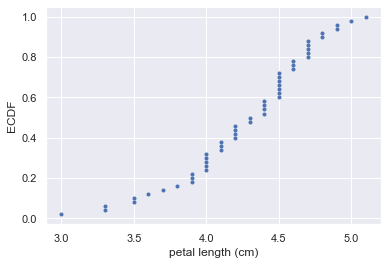

In [53]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

**Comparison of ECDFs**

ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use plt.plot() three times, once for each ECDF. Remember to include marker='.' and linestyle='none' as arguments inside plt.plot().

Instructions

- Compute ECDFs for each of the three species using your ecdf() function. The variables setosa_petal_length, versicolor_petal_length, and virginica_petal_length are all in your namespace. Unpack the ECDFs into x_set, y_set, x_vers, y_vers and x_virg, y_virg, respectively.
- Plot all three ECDFs on the same plot as dots. To do this, you will need three plt.plot() commands. Assign the result of each to _.
- A legend and axis labels have been added for you, so hit 'Submit Answer' to see all the ECDFs!


Show Answer (-70 XP)

- Follow exactly the same procedure as you did in the previous exercise, changing variable names appropriately! You should call the ecdf() function three times - once for each species - and have three plotting statements - one for each plot! plt.plot() can be used to achieve this: Each time you call it, it will draw a line on the same plot.

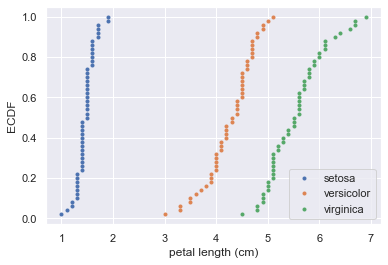

In [57]:
import numpy as np
versicolor_petal_length = np.array([
    4.7, 4.5, 4.9, 4., 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4., 4.7, 3.6,
    4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4., 4.9, 4.7, 4.3, 4.4, 4.8, 5., 4.5, 3.5,
    3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4., 4.4, 4.6, 4., 3.3, 4.2,
    4.2, 4.2, 4.3, 3., 4.1
])

setosa_petal_length = np.array([
    1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2,
    1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1., 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6,
    1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9,
    1.4, 1.6, 1.4, 1.5, 1.4
])

virginica_petal_length = np.array([
    6., 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5., 5.1,
    5.3, 5.5, 6.7, 6.9, 5., 5.7, 4.9, 6.7, 4.9, 5.7, 6., 4.8, 4.9, 5.6, 5.8,
    6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7,
    5.2, 5., 5.2, 5.4, 5.1
])

# Compute ECDFs

x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## 2. Quantitative exploratory data analysis

**Means and medians**

Which one of the following statements is true about means and medians? Answer the question: 

Possible Answers

- An outlier can significantly affect the value of both the mean and the median.
- **An outlier can significantly affect the value of the mean, but not the median.**
- Means and medians are in general both robust to single outliers.
- The mean and median are equal if there is an odd number of data points.

**Computing means**

<img src='figures/01.02-mean.PNG' width='20%' align='right'>

The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

Instructions

- Compute the mean petal length of Iris versicolor from Anderson's classic data set. The variable versicolor_petal_length is provided in your namespace. Assign the mean to mean_length_vers.
- Hit submit to print the result.

<img src='figures/01.02-mean-median.PNG' width='40%' align='left'>

In [58]:
# Compute the mean: mean_length_vers
mean_length_vers= np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


Median = 50% percentile

**Computing percentiles**

<img src='figures/01.02-percentiles.PNG' width='40%' align='right'>

In this exercise, you will compute the percentiles of petal length of Iris versicolor.

Instructions

- Create percentiles, a NumPy array of percentiles you want to compute. These are the 2.5th, 25th, 50th, 75th, and 97.5th. You can do so by creating a list containing these ints/floats and convert the list to a NumPy array using np.array(). For example, np.array([30, 50]) would create an array consisting of the 30th and 50th percentiles.
- Use np.percentile() to compute the percentiles of the petal lengths from the Iris versicolor samples. The variable versicolor_petal_length is in your namespace.
- Print the percentiles.

Hint

- Create a list of percentiles you want to compute using [], with the percentiles (and not fractions) inside the square brackets. You can then convert it to a NumPy array by passing it as an argument to np.array().
- To compute the percentiles of the petal lengths of iris versicolor samples, pass in versicolor_petal_length along with the NumPy array of percentiles you created above as arguments to the function np.percentile(). Assign the result to ptiles_vers.
- Print ptiles_vers using the print() function.

In [61]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


**Comparing percentiles to ECDF**

To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

Instructions

- Plot the percentiles as red diamonds on the ECDF. Pass the x and y co-ordinates - ptiles_vers and percentiles/100 - as positional arguments and specify the marker='D', color='red' and linestyle='none' keyword arguments. The argument for the y-axis - percentiles/100 has been specified for you.
- Display the plot.

Hint
- To overlay the percentiles, you will need to use plt.plot() with the x-axis data as the 1st positional argument and the the y-axis data (which has been specified for you) as the 2nd, in addition to the marker, color and linestyle arguments mentioned in the instructions. The x-axis data here is the array of percentiles of Iris versicolor you calculated earlier and stored in ptiles_vers, while the y-axis data is the array of percentiles you wanted to compute - percentiles - divided by 100 - as you want the y-axis to remain between 0 and 1.

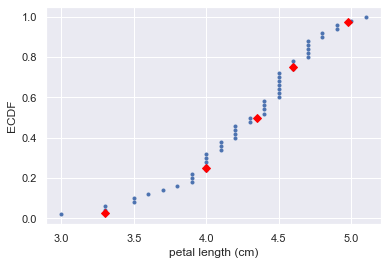

In [62]:
# Plot the ECDF
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red x's
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

**Box-and-whisker plot**

<img src='figures/01.02-boxplot.PNG' width='50%' align='right'>

Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, df, which contains the petal length data, in your namespace. Inspect the data frame df in the IPython shell using df.head() to make sure you know what the pertinent columns are.

For your reference, the code used to produce the box plot in the video is provided below:
```
_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)
_ = plt.xlabel('region')
_ = plt.ylabel('percent of vote for Obama')
```
In the IPython Shell, you can use sns.boxplot? or help(sns.boxplot) for more details on how to make box plots using seaborn.

Instructions

- The set-up is exactly the same as for the bee swarm plot; you just call sns.boxplot() with the same keyword arguments as you would sns.swarmplot(). The x-axis is 'species' and y-axis is 'petal length (cm)'.
- Don't forget to label your axes!
- Display the figure using the normal call.

Hint

- The function signature for Seaborn boxplots is sns.boxplot(x = 'X axis', y = 'Y axis', data = 'data frame name'). Use df.head() in the shell to inspect the data frame and take note of the column names. Of interest to us are species and petal length (cm).

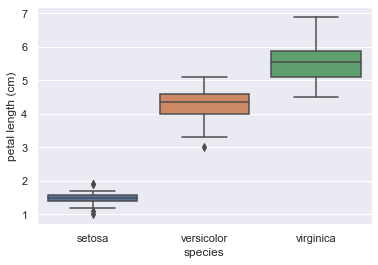

In [65]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=iris_df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

**Variance and standard deviation** (measure the variability and how spread is the data)

<img src='figures/01.02-variance.PNG' width='40%' align='left'>

**Variance**

- The mean squared distance of the data from their mean
- Informally, a measure of the spread of data

Where:

$X_i-X(mean) =$ distance from the mean



**Computing the variance**

It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations discussed in the videos. We will then use np.var() to compute it.

Instructions

- Create an array called differences that is the difference between the petal lengths (versicolor_petal_length) and the mean petal length. The variable versicolor_petal_length is already in your namespace as a NumPy array so you can take advantage of NumPy's vectorized operations.
- Square each element in this array. For example, x**2 squares each element in the array x. Store the result as diff_sq.
- Compute the mean of the elements in diff_sq using np.mean(). Store the result as variance_explicit.
- Compute the variance of versicolor_petal_length using np.var(). Store the result as variance_np.
- Print both variance_explicit and variance_np in one print call to make sure they are consistent.

Hint

- NumPy's vectorized operations make it straightforward to perform quick computations over entire arrays. Here, you need to subtract the mean of versicolor_petal_length (calculated using np.mean()) from versicolor_petal_length - itself a NumPy array - and assign the result to differences.
- Here, you need to square each element in the differences array and assign the result to diff_sq.
- Use np.mean() to calculate the mean of diff_sq and assign the result to variance_explicit.
- Use np.var() just as you have been using np.mean() to calculate the variance of versicolor_petal_length, and assign the result to variance_np.
- You can pass in multiple arguments to one print call, like so: print(a, b).

In [66]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq) # suma de todos / n

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


**The standard deviation and the variance**

As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using np.std() and comparing it to what you get by computing the variance with np.var() and then computing the square root.

Instructions

- Compute the variance of the data in the versicolor_petal_length array using np.var() and store it in a variable called variance.
- Print the square root of this value.
- Print the standard deviation of the data in the versicolor_petal_length array using np.std().

Hint

- Use np.var() exactly as you did in the earlier exercise and assign the result to variance.
- Print the square root of variance using np.sqrt().
- Print the standard deviation of versicolor_petal_length using np.std(). (You can pass the exercise by using np.sqrt(variance) twice, but do try calculating the standard deviation!)

In [67]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


**Covariance**

- A measure of how two quantities vary together.

<img src='figures/01.02-covariance1.PNG' width='40%'>
<img src='figures/01.02-covariance2.PNG' width='40%'>
<img src='figures/01.02-covariance3.PNG' width='40%'>

**Pearon correlation coefficient** (greek letter rho =  $\rho$)

- How two variables depends on each other.
- The comparison of the variability in the data due to codependence (covariance) to the variability inherent in each variable independently (std). 
- Dimentionless.
- Good metric for correlation between two variables.

<img src='figures/01.02-pearson.PNG' width='35%'>
<img src='figures/01.02-pearson1.PNG' width='60%'>


- A value of correlation coefficient of 0: no correlation



**Scatter plots**

When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

For your reference, the code used to produce the scatter plot in the video is provided below:
```
_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')
_ = plt.xlabel('total votes (thousands)')
_ = plt.ylabel('percent of vote for Obama')
```
Instructions

- Use plt.plot() with the appropriate keyword arguments to make a scatter plot of versicolor petal length (x-axis) versus petal width (y-axis). The variables versicolor_petal_length and versicolor_petal_width are already in your namespace. Do not forget to use the marker='.' and linestyle='none' keyword arguments.
- Label the axes.
- Display the plot.

Hint

- Refer back to the video to see how Justin creates a scatterplot of the election data. The function signature is plt.plot('X axis', 'Y axis', marker = '.', linestyle = 'none'). The X axis here is versicolor_petal_length, while the Y axis is versicolor_petal_width.
- Label axes using plt.xlabel('X axis name') and plt.ylabel('Y axis name').
- To display the plot, use plt.show().

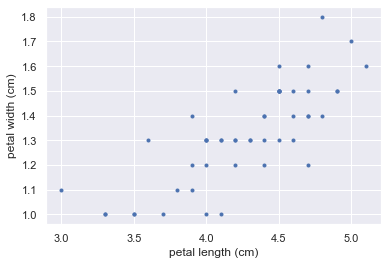

In [70]:
versicolor_petal_length = np.array([
    4.7, 4.5, 4.9, 4., 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4., 4.7, 3.6,
    4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4., 4.9, 4.7, 4.3, 4.4, 4.8, 5., 4.5, 3.5,
    3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4., 4.4, 4.6, 4., 3.3, 4.2,
    4.2, 4.2, 4.3, 3., 4.1
])

versicolor_petal_width = np.array([
    1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1., 1.3, 1.4, 1., 1.5, 1., 1.4, 1.3,
    1.4, 1.5, 1., 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.,
    1.1, 1., 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1., 1.3,
    1.2, 1.3, 1.3, 1.1, 1.3
])

# Make a scatter plot
_ = plt.plot(versicolor_petal_length,
             versicolor_petal_width,
             marker='.',
             linestyle='none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('petal width (cm)')

# Show the result
plt.show()

**Variance and covariance by looking**

Consider four scatter plots of - data, appearing to the right. Which has, respectively,

- the highest variance in the variable ,
- the highest covariance,
- negative covariance?

<img src='figures/01.02-pearson2.PNG' width='40%'>

Answer: d, c, b


**Computing the covariance**

The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array **where entries [0,1] and [1,0] are the covariances**. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

To remind you how the I. versicolor petal length and width are related, we include the scatter plot you generated in a previous exercise.

Instructions

- Use np.cov() to compute the covariance matrix for the petal length (versicolor_petal_length) and width (versicolor_petal_width) of I. versicolor.
- Print the covariance matrix.
- Extract the covariance from entry [0,1] of the covariance matrix. Note that by symmetry, entry [1,0] is the same as entry [0,1].
- Print the covariance.

Hint

- To compute the covariance matrix, pass in the NumPy arrays whose covariance you want to compute - versicolor_petal_length and versicolor_petal_width - as arguments to np.cov(), and assign the result to covariance_matrix.
- To extract the covariance of length and width, you need to extract the entry [0,1] from the covariance matrix. For example, the entry [0,0] can be extracted by the statement covariance_matrix[0,0].

In [71]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


**Computing the Pearson correlation coefficient**

As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the `np.corrcoef()` function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, **you will write a function, pearson_r(x, y)** that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.

Again, we include the scatter plot you generated in a previous exercise to remind you how the petal width and length are related.

Instructions

- Define a function with signature pearson_r(x, y).
- Use np.corrcoef() to compute the correlation matrix of x and y (pass them to np.corrcoef() in that order).
- The function returns entry [0,1] of the correlation matrix.
- Compute the Pearson correlation between the data in the arrays versicolor_petal_length and versicolor_petal_width. Assign the result to r.
- Print the result.

Hint

- After filling in the blanks with the function signature specified in the instructions, you can calculate the correlation matrix by passing in x and y - in order - to np.corrcoef(). Store the result of this in corr_mat.
- To compute the Pearson correlation coefficient for I. versicolor, you can pass in the arrays versicolor_petal_length and versicolor_petal_width to the function pearson_r() that you just defined. Be sure to assign the result to r.
- Finally, use the print() function to display the Pearson correlation coefficient you just computed!

In [72]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(versicolor_petal_width, versicolor_petal_length)

# Print the result
print(r)

0.7866680885228169


## 3.Thinking probabilistically-- Discrete variables

- Given a set of data, you describe probabilistically what you might expect of those data were acquired again, again and again.
- The heart of statistical inference.

<img src='figures/01.03-probability1.PNG' width='30%' align='left'>
<img src='figures/01.03-probability2.PNG' width='30%' align='left'>
<img src='figures/01.03-probability3.PNG' width='30%' align='left'>

**What is the goal of statistical inference?**

Why do we do statistical inference?

Possible Answers

- To draw probabilistic conclusions about what we might expect if we collected the same data again.
- To draw actionable conclusions from data.
- To draw more general conclusions from relatively few data or observations.
- **All of these.**

Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

---

**Why do we use the language of probability?**

Which of the following is not a reason why we use probabilistic language in statistical inference?

Possible Answers

- Probability provides a measure of uncertainty.
- **Probabilistic language is not very precise.**
- Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

Probabilistic language is in fact very precise. It precisely describes uncertainty.

### Random number generators and hacker statistics

**Hacker statistics**

- Uses simulated repeated measurements to compute probabilites.

**The np.random module**

- Suite of functions based on random number generation
- `np.random.random()` : draw a number between 0 an 1
    - Toss coin example: <0.5 : heads, >= 0.5 : tails
    
**Bernoulli trial**

- An experiment that has two options, "success" (True) and "failure" (False).

**Random number seed**

- Integer fed into random number generating algorithm
- Manually seed random number generator if you need reproducibility
- Specified using `np.random.seed()`

In [73]:
# Simulating 4 coin flips

import numpy as np
np.random.seed(42)
random_numbers = np.random.random(size=4)
random_numbers

array([0.37454012, 0.95071431, 0.73199394, 0.59865848])

In [74]:
heads = random_numbers < 0.5
heads

array([ True, False, False, False])

In [75]:
np.sum(heads)

1

In [76]:
# Simulating 4 coin flips FUNCTION
n_all_heads = 0

# Initialize number of 4-heads trials
for _ in range(10000):
    heads = np.random.random(size=4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

n_all_heads / 100000.0621

0.006189996156012388

**Hacker stats probabilities**

- Determine how to simulate data
- Simulate many many times
- Probability is approximately fraction of trials with the outcome of interest

**Generating random numbers using the np.random module**

We will be hammering the np.random module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, np.random.random() for a test spin. The function returns a random number between zero and one. Call np.random.random() a few times in the IPython shell. You should see numbers jumping around between zero and one.

In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument size=4 to np.random.random(). Such an approach is more efficient than a for loop: in this exercise, however, you will write a for loop to experience hacker statistics as the practice of repeating an experiment over and over again.

Instructions

- Seed the random number generator using the seed 42.
- Initialize an empty array, random_numbers, of 100,000 entries to store the random numbers. Make sure you use np.empty(100000) to do this.
- Write a for loop to draw 100,000 random numbers using np.random.random(), storing them in the random_numbers array. To do so, loop over range(100000).
- Plot a histogram of random_numbers. It is not necessary to label the axes in this case because we are just checking the random number generator. Hit 'Submit Answer' to show your plot.

Hint

- You can set a random seed using the function np.random.seed().
- To initialize an empty array of, say, 5 entries, you can use np.empty(5).
for i in range(100000) initializes a for loop that will range over 100,000 values; for each of the 100,000 entries, you can use np.random.random() to draw a random number. Be sure to store the result in the appropriate index i of random_numbers.
- You can pass in random_numbers to plt.hist to plot a histogram.

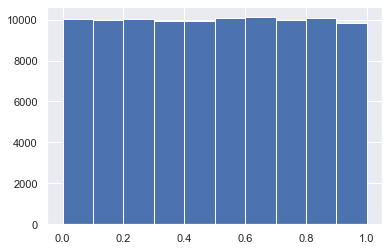

In [77]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

The histogram is almost exactly flat across the top, indicating that there is equal chance that a randomly-generated number is in any of the bins of the histogram.

**The np.random module and Bernoulli trials**

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability  of landing heads (success) and probability  of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.

Instructions

- Define a function with signature perform_bernoulli_trials(n, p).
- Initialize to zero a variable n_success the counter of Trues, which are Bernoulli trial successes.
- Write a for loop where you perform a Bernoulli trial in each iteration and increment the number of success if the result is True. Perform n iterations by looping over range(n).
- To perform a Bernoulli trial, choose a random number between zero and one using np.random.random(). If the number you chose is less than p, increment n_success (use the += 1 operator to achieve this).
- The function returns the number of successes n_success.

Hint

- The number of 'successes', n_success, we start with is 0, so you need to initialize n_success before we can perform our trials.
- For each of the n trials, use np.random.random() to choose a random number between 0 and 1 and store the result in random_number.
- If the random_number selected is < than the probability of success p, the trial is considered a success and n_success will need to be incremented with +=. Be sure to pay attention to indentation of your for loop and if statement.

In [78]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success  so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

**How many defaults might we expect?**

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

Instructions

- Seed the random number generator to 42.
- Initialize n_defaults, an empty array, using np.empty(). It should contain 1000 entries, since we are doing 1000 simulations.
- Write a for loop with 1000 iterations to compute the number of defaults per 100 loans using the perform_bernoulli_trials() function. It accepts two arguments: the number of trials n - in this case 100 - and the probability of success p - in this case the probability of a default, which is 0.05. On each iteration of the loop store the result in an entry of n_defaults.
- Plot a histogram of n_defaults. Include the normed=True keyword argument so that the height of the bars of the histogram indicate the probability.
- Show your plot.

Hint

- As you did earlier, you can set the random seed using np.random.seed(42).
- An empty array can be initialized using np.empty(), with the number of entries specified inside the parentheses.
- Earlier, you looped over a range of 100,000 values and then n values using for i in range(100000) and for i in range(n), respectively. Here, we need to loop over the number of entries we specified above. While we have 1000 entries, or simulations, we will only be performing 100 bernoulli trials, each of which has a probability of success p = 0.05; these are the arguments that will need to be passed in to the perform_bernoulli_trials() function that was defined in the previous exercise. For each trial, the result should be assigned to the appropriate index of n_defaults.
- You can plot a histogram using plt.hist(), but remember to specify normed=True in addition to n_defaults.
- Use plt.show() to display the plot.

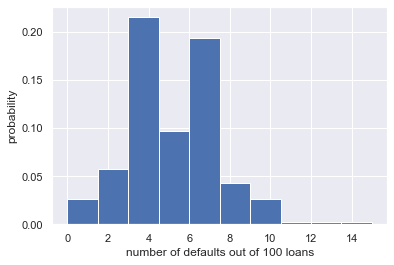

In [80]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

This is actually not an optimal way to plot a histogram when the results are known to be integers. We will revisit this in forthcoming exercises.

**Will the bank fail?**

Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

Instructions

- Compute the x and y values for the ECDF of n_defaults.
- Plot the ECDF, making sure to label the axes. Remember to include marker = '.' and linestyle = 'none' in addition to x and y in your call plt.plot().
- Show the plot.
- Compute the total number of entries in your n_defaults array that were greater than or equal to 10. To do so, compute a boolean array that tells you whether a given entry of n_defaults is >= 10. Then sum all the entries in this array using np.sum(). For example, np.sum(n_defaults <= 5) would compute the number of defaults with 5 or fewer defaults.
- The probability that the bank loses money is the fraction of n_defaults that are greater than or equal to 10. Print this result by hitting 'Submit Answer'!

Hint

- You can compute the x and y values for the ECDF by unpacking the output of ecdf(n_defaults) appropriately.
- To plot the x and y values you just computed, pass them into the plt.plot() function. Remember to include marker = '.' and linestyle = 'none' as arguments inside 'plt.plot(), as well as to give labels using plt.xlabel() and plt.ylabel().
- Use plt.show() to display the ECDF you just plotted.
- np.sum() is a useful function when you need to compute totals of any kind. You can take advantage of NumPy's vectorized operations by subsetting n_defaults appropriately with >= and passing it into np.sum(). Be sure to assign the result to n_lose_money.

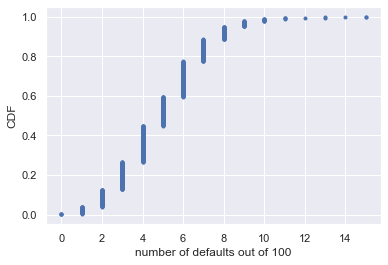

Probability of losing money = 0.022


In [81]:
# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

As we might expect, we most likely get 5/100 defaults. But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

**Probability distribution and stories: The Binomial Distribution**

**Probability mass function (PMF)**

- The set of probabilities of discrete outcomes

<img src='figures/01.03-pmf.PNG' width='50%' align='left'>

**Probability distribution**

- A mathematical description of outcomes

**Discrete Uniform distribution: the story**

The outcome of rolling a single fair dice is
- discrete
- Uniformily distributed

**Binomial distribution: the story**
- The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed
- The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed



In [82]:
# Sampling from the Binomial distribution

np.random.binomial(4, 0.5) # 4 toss coin flips for 2 options: heads or tails

2

In [83]:
np.random.binomial(4, 0.5, size=10) # 10 times

array([2, 2, 2, 2, 2, 3, 3, 2, 2, 0])

In [84]:
# The Binomial PMF

samples = np.random.binomial(60, 0.1, size=10000)
n = 60
p = 0.1

<img src='figures/01.03-binomial-pmf.PNG' width='40%' align='left'>

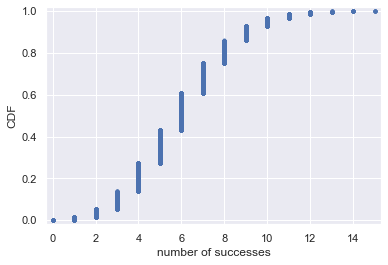

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
x, y = ecdf(samples)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('number of successes')
plt.ylabel('CDF')
plt.show()

**Sampling out of the Binomial distribution**

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.

Instructions
- Draw samples out of the Binomial distribution using np.random.binomial(). You should use parameters n = 100 and p = 0.05, and set the size keyword argument to 10000.
- Compute the CDF using your previously-written ecdf() function.
- Plot the CDF with axis labels. The x-axis here is the number of defaults out of 100 loans, while the y-axis is the CDF.
- Show the plot.

Hint
- You can generate samples out of a Binomial distribution using np.random.binomial(). Refer to the first instruction to see what parameters you need to use, and assign the samples to n_defaults.
- Like in the earlier exercise, compute x and y by unpacking the output of ecdf(n_defaults).
- Use plt.plot() with the appropriate arguments, including marker = '.' and linestyle = 'none'.
- Don't forget to label your axes with plt.xlabel() and plt.ylabel().
- Finally, as always, use plt.show() to display the plot.

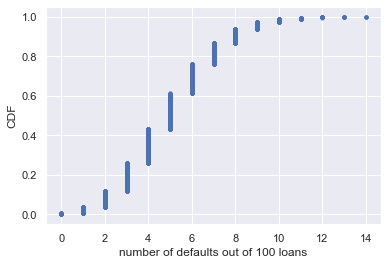

In [87]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

If you know the story, using built-in algorithms to directly sample out of the distribution is much faster.

**Plotting the Binomial PMF**

As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.

Instructions
- Using np.arange(), compute the bin edges such that the bins are centered on the integers. Store the resulting array in the variable bins.
- Use plt.hist() to plot the histogram of n_defaults with the normed=True and bins=bins keyword arguments.
- Show the plot.

Hint
- The bin edges can be computed using np.arange(), going from 0 to max(n_defaults) + 1.5. Be sure to subtract 0.5 from this array and store it in the variable bins.
- You can generate the histogram with plt.hist(), including the arguments normed=True and bins=bins alongside n_defaults.
- Label your axes with plt.xlabel() and plt.ylabel(). Note that we are now plotting the PMF on the Y axis.
- Show your plot with plt.show().

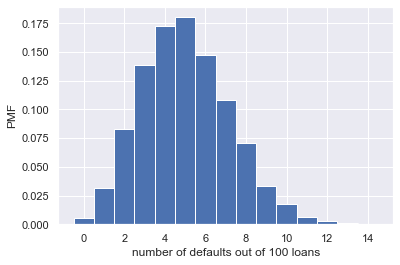

In [89]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

**Poisson process**
- The timing of the next event is completely independent of when the previous event happened.

**Examples of Poisson processes**
- Natural births in a given hospital
- Hit on a website during a given hour
- Meteor strikes
- Molecular collisions in a gas
- Aviation incidents
- Buses in Poissonville

**Poisson distribution**
- The number r of arrivals of a Poisson process in a given time interval with average rate of ? arrivals per interval is Poisson distributed.
- The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.

- Limit of the Binomial distribution for low probability of success and large number of trials.
- That is, for rare events.


**Relationship between Binomial and Poisson distributions**

You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to  approximates a Binomial distribution for  Bernoulli trials with probability  of success (with  large and  small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters  and  such that $np=10$.

Instructions
- Using the np.random.poisson() function, draw 10000 samples from a Poisson distribution with a mean of 10.
Make a list of the n and p values to consider for the Binomial distribution. Choose n = [20, 100, 1000] and p = [0.5, 0.1, 0.01] so that  is always 10.
- Using np.random.binomial() inside the provided for loop, draw 10000 samples from a Binomial distribution with each n, p pair and print the mean and standard deviation of the samples. There are 3 n, p pairs: 20, 0.5, 100, 0.1, and 1000, 0.01. These can be accessed inside the loop as n[i], p[i].

Hint
- To draw samples from a Poisson distribution, you can use the np.random.poisson() function, passing in the appropriate mean and size.
- Follow the second instruction exactly to create the lists containing the values of n and p.
- To draw samples from a Binomial distribution, you can use np.random.binomial(). Inside the for loop, be sure to index n and p as n[i] and p[i] when passing them in as arguments to np.random.binomial(), and don't forget to pass in the desired number of samples as well.

In [90]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0106 3.1413194106935385
n = 20 Binom: 10.024 2.2278294369183653
n = 100 Binom: 10.0195 2.990839305278704
n = 1000 Binom: 9.9895 3.1427360293222213


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability $p$ gets lower and lower.

**How many no-hitters in a season?**

In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?

Note: The no-hitter data set was scraped and calculated from the data sets available at retrosheet.org (license).

<img src='figures/01.03-poisson_example.PNG' width='30%' align='left'>

Possible Answers
- Discrete uniform
- Binomial
- Poisson
- **Both Binomial and Poisson, though Poisson is easier to model and compute.**
- Both Binomial and Poisson, though Binomial is easier to model and compute.

Correct! When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

**Was 2015 anomalous?**

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

Instructions
- Draw 10000 samples from a Poisson distribution with a mean of 251/115 and assign to n_nohitters.
- Determine how many of your samples had a result greater than or equal to 7 and assign to n_large.
- Compute the probability, p_large, of having 7 or more no-hitters by dividing n_large by the total number of samples (10000).
- Hit 'Submit Answer' to print the probability that you calculated.

Hint
- As you have done in earlier exercises, you can draw samples from a Poisson distribution using the np.random.poisson() function, passing in the mean and size as arguments.
- Recall how in an earlier exercise, you calculated the number of 100-loan simulations with 10 more defaults using np.sum(n_defaults >= 10). With a slight tweak to this code, you can calculate n_large by substituting in the appropriate number of n_nohitters that the instruction specifies.
- To compute p_large, you just have to divide n_large by the total number of samples.

In [93]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0068


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

## 4. Thinking probabilistically-- Continuous variables

### 4.1. Probability density functions

Continuous variables
- Quantities that can take any value, not just discrete values

Probability density function (PDF)
- Continuous analog to the PMF
- Mathematical description of the relative likelihood of observing a value of a continuous variable

**The Normal PDF**

In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

Instructions
- Draw 100,000 samples from a Normal distribution that has a mean of 20 and a standard deviation of 1. Do the same for Normal distributions with standard deviations of 3 and 10, each still with a mean of 20. Assign the results to samples_std1, samples_std3 and samples_std10, respectively.
- Plot a histograms of each of the samples; for each, use 100 bins, also using the keyword arguments normed=True and histtype='step'. The latter keyword argument makes the plot look much like the smooth theoretical PDF. You will need to make 3 plt.hist() calls.
- Hit 'Submit Answer' to make a legend, showing which standard deviations you used, and show your plot! There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of PDFs.

Hint
- In earlier exercises, you drew samples from the Binomial and Poisson distributions. You can similarly draw samples from the Normal distribution using np.random.normal(), passing in the mean, standard deviation, and sample size as arguments (in that order). Be sure to assign each of the samples to samples_std1, samples_std3, and samples.std10, respectively.
- Just as you did in earlier exercises, generate the appropriate histogram using plt.hist(). In addition to bins and normed, there is one new parameter you have to be aware of here: histtype. Generate histograms for each of the samples by passing in the arguments as described in the instructions.

<img src='figures/01.04-normal-pdf.PNG' width='50%'>

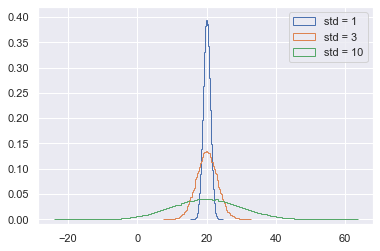

In [97]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std3, bins=100, density=True, histtype='step')
_ = plt.hist(samples_std10, bins=100, density=True, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

Great work! You can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

**The Normal CDF**

<img src='figures/01.04-normal-cdf.PNG' width='50%'>

Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as samples_std1, samples_std3, and samples_std10), generate and plot the CDFs.

Instructions
- Use your ecdf() function to generate x and y values for CDFs: x_std1, y_std1, x_std3, y_std3 and x_std10, y_std10, respectively.
- Plot all three CDFs as dots (do not forget the marker and linestyle keyword arguments!).
- Hit submit to make a legend, showing which standard deviations you used, and to show your plot. There is no need to label the axes because we have not defined what is being described by the Normal distribution; we are just looking at shapes of CDFs.

Hint
- In earlier chapters and exercises, you generated x and y values for CDFs using x, y = ecdf(data). Tweak the code so that you are now computing the x and y values for the Normal CDFs.
- To plot the CDFs as dots, remember to include the arguments marker = '.' and linestyle = none inside plt.plot().

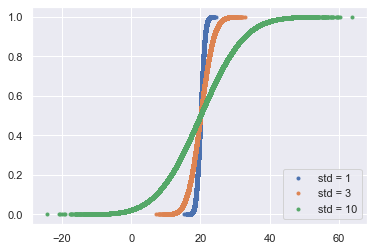

In [98]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

Great work! The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

### 4.2. Introduction to the Normal distribution

**Normal distribution**

- Describes a continuous variable whose PDF has a single symmetric peak.
<img src='figures/01.04-normal-dist.PNG' width='40%'>

|Parameter|-|Calculated from data|
|---|---|:---|
|mean of a Normal distribution| =/ | mean computed from data|
|st. dev. of a Normal distribution| =/ |standard deviation computed from data|

<img src='figures/01.04-normal-comparison.PNG' width='40%'>

In [122]:
import pandas as pd

light = pd.read_csv('data/01-michelson_speed_of_light.csv')
light = light.iloc[:,1:14]
light

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s)
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,July 1,2,86,2.14,135.145,133.00,0.08,1.467,-0.252,257.28,33.311,0.99627,299940
96,July 2,3,86,99.85,0.400,99.45,0.05,1.450,-0.252,192.95,33.205,0.99606,299950
97,July 2,3,86,66.74,0.400,66.34,0.03,1.450,-0.252,128.63,33.205,0.99586,299800
98,July 2,3,86,50.16,0.400,47.96,0.07,1.467,-0.252,96.48,33.205,0.99580,299810


In [123]:
michelson_speed_of_light = light['velocity of light in air (km/s)']

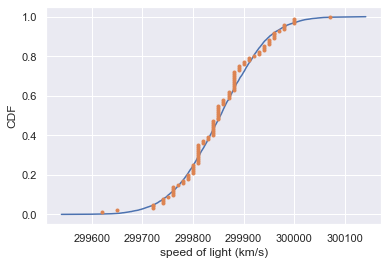

In [125]:
# Checking Normality of Michelson data
import numpy as np
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')
plt.show()

### 4.3. The Normal distribution: Properties and warnings

**Gauss and the 10 Deutschmark banknote**
What are the mean and standard deviation, respectively, of the Normal distribution that was on the 10 Deutschmark banknote, shown to the right?

<img src='figures/01.04-normal-gauss.PNG' width='30%'>

Possible Answers
- **mean = 3, std = 1**
- mean = 3, std = 2
- mean = 0.4, std = 1
- mean = 0.6, std = 6

<img src='figures/01.04-normal-curve.PNG' width='40%'>


**Are the Belmont Stakes results Normally distributed?**

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

Note: Justin scraped the data concerning the Belmont Stakes from the Belmont Wikipedia page.

Instructions
- Compute mean and standard deviation of Belmont winners' times with the two outliers removed. The NumPy array belmont_no_outliers has these data.
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal().
- Compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- Hit submit to plot the CDF of your samples with the ECDF, label your axes and show the plot.

Hint
- The mean and standard deviation of belmont_no_outliers can be computed using np.mean() and np.std(), respectively. Assign the mean to the variable mu and the standard deviation to the variable sigma.
- To generate the appropriate normal distribution, use the mu and sigma calculated above along with size = 10000 as arguments passed to np.random.normal().
- Use the ecdf() function with the appropriate choice of data (samples or belmont_no_outliers) to compute the CDF of the theoretical samples and the ECDF of the Belmont winners' data. Be sure to unpack the output of ecdf() correctly.

In [127]:
belmont_no_outliers = np.array([
    148.51, 146.65, 148.52, 150.7, 150.42, 150.88, 151.57, 147.54, 149.65,
    148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56, 151.19, 147.88,
    149.16, 148.82, 148.96, 152.02, 146.82, 149.97, 146.13, 148.1, 147.2, 146.,
    146.4, 148.2, 149.8, 147., 147.2, 147.8, 148.2, 149., 149.8, 148.6, 146.8,
    149.6, 149., 148.2, 149.2, 148., 150.4, 148.8, 147.2, 148.8, 149.6, 148.4,
    148.4, 150.2, 148.8, 149.2, 149.2, 148.4, 150.2, 146.6, 149.8, 149., 150.8,
    148.6, 150.2, 149., 148.6, 150.2, 148.2, 149.4, 150.8, 150.2, 152.2, 148.2,
    149.2, 151., 149.6, 149.6, 149.4, 148.6, 150., 150.6, 149.2, 152.6, 152.8,
    149.6, 151.6, 152.8, 153.2, 152.4, 152.2
])

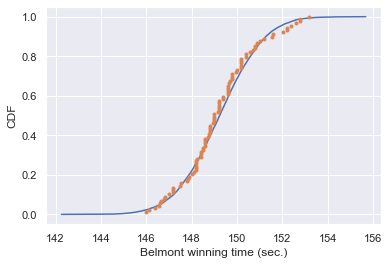

In [128]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

**What are the chances of a horse matching or beating Secretariat's record?**

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

Instructions
- Take 1,000,000 samples from the normal distribution using the np.random.normal() function. The mean mu and standard deviation sigma are already loaded into the namespace of your IPython instance.
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
Print the result.

Hint
- Use the np.random.normal() function to draw 1000000 samples with mean mu and standard deviation sigma.
- Recall how in an earlier chapter you calculated the number of samples that are seven or greater using np.sum(n_nohitters >= 7). Here, you are asked to calculate a fraction and not just a total, so be sure to also divide by the number of samples after you subset samples appropriately inside np.sum().

In [129]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000623


Great work! We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

### 4.4. The Exponential distribution


#### Theory

**The Exponential distribution**

- The waiting time between arrivals of a Poisson process is Exponentially distributed

**The Exponential PDF**

<img src='figures/01.04-exponential.PNG' width='40%'>


#### Practice

**Matching a story and a distribution**

How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability distribution of the time between no hitters.

Answer the question

- Normal
- **Exponential**
- Poisson
- Uniform

**Waiting for the next Secretariat**

Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? Choose the best answer.

Answer the question

- Normal, because the distribution of Belmont winning times are Normally distributed.
- Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.
- Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.
- **Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.**

Correct! The Exponential distribution describes the waiting times between rare events, and Secretariat is rare!

**If you have a story, you can simulate it!**

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

Instructions

- Define a function with call signature successive_poisson(tau1, tau2, size=1) that samples the waiting time for a no-hitter and a hit of the cycle.
- Draw waiting times tau1 (size number of samples) for the no-hitter out of an exponential distribution and assign to t1.
- Draw waiting times tau2 (size number of samples) for hitting the cycle out of an exponential distribution and assign to t2.
- The function returns the sum of the waiting times for the two events.


Show Answer (-70 XP)

- Similar to how you have previously sampled from the Binomial, Poisson, and Normal distributions, you can sample from the Exponential distribution using np.random.exponential(). Be sure to enter the appropriate waiting times (tau1 and tau2) and size parameters, and assign to t1 and t2.

In [1]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

**Distribution of no-hitters and cycles**

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

Instructions

- Use your successive_poisson() function to draw 100,000 out of the distribution of waiting times for observing a no-hitter and a hitting of the cycle.
- Plot the PDF of the waiting times using the step histogram technique of a previous exercise. Don't forget the necessary keyword arguments. You should use bins=100, normed=True, and histtype='step'.
- Label the axes.
- Show your plot.

Hint

- Recall, from the earlier exercise, that tau1 denotes the mean waiting time for a no-hitter, while tau2 denotes the mean waiting time for hitting the cycle. Here, you are given the mean waiting time for no-hitters, mean waiting time for hitting the cycle, as well as the sample size. Enter this information into the sucessive_poisson() function you defined previously.
- Inside plt.hist(), you have to provide the keyword arguments bins=100, normed=True, and histtype=step, alongside waiting_times to plot the PDF of the waiting times.
- Use plt.xlabel() and plt.ylabel() to give your plot descriptive labels.
- Display your plot using plt.show().

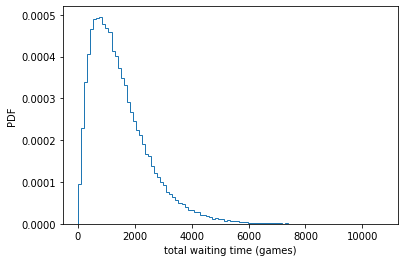

In [6]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
plt.hist(waiting_times, bins=100, histtype='step', density=True)

# Label axes
plt.xlabel('total waiting time (games)')
plt.ylabel('PDF')

# Show the plot
plt.show()